In [33]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 1000
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_epoch_1000.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

print(model.summary())

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().steps_per_epoch
    train_history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=128,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max

128/128 [==============================] - 9s - loss: 1.1605 - acc: 0.5764 - val_loss: 1.0605 - val_acc: 0.6177
Epoch 44/1000
128/128 [==============================] - 9s - loss: 1.2130 - acc: 0.5623 - val_loss: 1.0333 - val_acc: 0.6400
Epoch 45/1000
128/128 [==============================] - 9s - loss: 1.1846 - acc: 0.5803 - val_loss: 1.0258 - val_acc: 0.6371
Epoch 46/1000
128/128 [==============================] - 9s - loss: 1.1894 - acc: 0.5767 - val_loss: 1.0790 - val_acc: 0.6113
Epoch 47/1000
128/128 [==============================] - 9s - loss: 1.1759 - acc: 0.5862 - val_loss: 0.9796 - val_acc: 0.6556
Epoch 48/1000
128/128 [==============================] - 9s - loss: 1.1689 - acc: 0.5842 - val_loss: 1.0328 - val_acc: 0.6349
Epoch 49/1000
128/128 [==============================] - 9s - loss: 1.1930 - acc: 0.5771 - val_loss: 1.0217 - val_acc: 0.6377
Epoch 50/1000
128/128 [==============================] - 9s - loss: 1.1284 - acc: 0.5981 - val_loss: 0.9776 - val_acc: 0.6545
Epoch 

128/128 [==============================] - 9s - loss: 1.0670 - acc: 0.6233 - val_loss: 0.9041 - val_acc: 0.6813
Epoch 109/1000
128/128 [==============================] - 9s - loss: 1.0818 - acc: 0.6116 - val_loss: 0.8556 - val_acc: 0.7089
Epoch 110/1000
128/128 [==============================] - 9s - loss: 1.0616 - acc: 0.6226 - val_loss: 0.8906 - val_acc: 0.6882
Epoch 111/1000
128/128 [==============================] - 9s - loss: 1.0774 - acc: 0.6140 - val_loss: 0.9637 - val_acc: 0.6601
Epoch 112/1000
128/128 [==============================] - 9s - loss: 1.0481 - acc: 0.6326 - val_loss: 0.8707 - val_acc: 0.6968
Epoch 113/1000
128/128 [==============================] - 9s - loss: 1.0471 - acc: 0.6267 - val_loss: 0.8784 - val_acc: 0.6959
Epoch 114/1000
128/128 [==============================] - 9s - loss: 1.0658 - acc: 0.6074 - val_loss: 0.9077 - val_acc: 0.6882
Epoch 115/1000
128/128 [==============================] - 9s - loss: 1.0313 - acc: 0.6416 - val_loss: 0.9328 - val_acc: 0.6682

128/128 [==============================] - 9s - loss: 0.9792 - acc: 0.6572 - val_loss: 0.8489 - val_acc: 0.7032
Epoch 173/1000
128/128 [==============================] - 9s - loss: 0.9914 - acc: 0.6592 - val_loss: 0.8192 - val_acc: 0.7142
Epoch 174/1000
128/128 [==============================] - 9s - loss: 1.0036 - acc: 0.6484 - val_loss: 0.9167 - val_acc: 0.6794
Epoch 175/1000
128/128 [==============================] - 9s - loss: 0.9675 - acc: 0.6570 - val_loss: 0.9019 - val_acc: 0.6853
Epoch 176/1000
128/128 [==============================] - 9s - loss: 1.0003 - acc: 0.6475 - val_loss: 0.8467 - val_acc: 0.7039
Epoch 177/1000
128/128 [==============================] - 9s - loss: 1.0017 - acc: 0.6555 - val_loss: 0.7992 - val_acc: 0.7205
Epoch 178/1000
128/128 [==============================] - 9s - loss: 0.9943 - acc: 0.6453 - val_loss: 0.8275 - val_acc: 0.7118
Epoch 179/1000
128/128 [==============================] - 9s - loss: 1.0100 - acc: 0.6487 - val_loss: 0.8001 - val_acc: 0.7217

128/128 [==============================] - 9s - loss: 0.9851 - acc: 0.6589 - val_loss: 0.8592 - val_acc: 0.7045
Epoch 237/1000
128/128 [==============================] - 9s - loss: 0.9288 - acc: 0.6746 - val_loss: 0.8672 - val_acc: 0.7043
Epoch 238/1000
128/128 [==============================] - 9s - loss: 0.9688 - acc: 0.6619 - val_loss: 0.8366 - val_acc: 0.7063
Epoch 239/1000
128/128 [==============================] - 9s - loss: 0.9370 - acc: 0.6663 - val_loss: 0.7774 - val_acc: 0.7325
Epoch 240/1000
128/128 [==============================] - 9s - loss: 0.9588 - acc: 0.6626 - val_loss: 0.7397 - val_acc: 0.7460
Epoch 241/1000
128/128 [==============================] - 9s - loss: 0.9514 - acc: 0.6592 - val_loss: 0.8355 - val_acc: 0.7142
Epoch 242/1000
128/128 [==============================] - 9s - loss: 0.9619 - acc: 0.6543 - val_loss: 0.7980 - val_acc: 0.7269
Epoch 243/1000
128/128 [==============================] - 9s - loss: 0.9700 - acc: 0.6641 - val_loss: 0.7735 - val_acc: 0.7340

128/128 [==============================] - 9s - loss: 0.9671 - acc: 0.6636 - val_loss: 0.7259 - val_acc: 0.7469
Epoch 301/1000
128/128 [==============================] - 9s - loss: 0.9121 - acc: 0.6804 - val_loss: 0.7334 - val_acc: 0.7472
Epoch 302/1000
128/128 [==============================] - 9s - loss: 0.9487 - acc: 0.6670 - val_loss: 0.7993 - val_acc: 0.7177
Epoch 303/1000
128/128 [==============================] - 9s - loss: 0.9206 - acc: 0.6863 - val_loss: 0.7713 - val_acc: 0.7298
Epoch 304/1000
128/128 [==============================] - 9s - loss: 0.9452 - acc: 0.6704 - val_loss: 0.8329 - val_acc: 0.7099
Epoch 305/1000
128/128 [==============================] - 9s - loss: 0.9373 - acc: 0.6689 - val_loss: 0.7999 - val_acc: 0.7167
Epoch 306/1000
128/128 [==============================] - 9s - loss: 0.9305 - acc: 0.6819 - val_loss: 0.9558 - val_acc: 0.6798
Epoch 307/1000
128/128 [==============================] - 9s - loss: 0.9540 - acc: 0.6660 - val_loss: 0.8336 - val_acc: 0.7125

128/128 [==============================] - 9s - loss: 0.8760 - acc: 0.6897 - val_loss: 0.8055 - val_acc: 0.7163
Epoch 365/1000
128/128 [==============================] - 9s - loss: 0.9371 - acc: 0.6707 - val_loss: 0.8037 - val_acc: 0.7204
Epoch 366/1000
128/128 [==============================] - 9s - loss: 0.9084 - acc: 0.6870 - val_loss: 0.7457 - val_acc: 0.7412
Epoch 367/1000
128/128 [==============================] - 9s - loss: 0.9193 - acc: 0.6748 - val_loss: 0.7538 - val_acc: 0.7389
Epoch 368/1000
128/128 [==============================] - 9s - loss: 0.9157 - acc: 0.6863 - val_loss: 0.7495 - val_acc: 0.7406
Epoch 369/1000
128/128 [==============================] - 9s - loss: 0.8861 - acc: 0.6863 - val_loss: 0.8062 - val_acc: 0.7250
Epoch 370/1000
128/128 [==============================] - 9s - loss: 0.9202 - acc: 0.6753 - val_loss: 0.7285 - val_acc: 0.7496
Epoch 371/1000
128/128 [==============================] - 9s - loss: 0.9136 - acc: 0.6782 - val_loss: 0.7620 - val_acc: 0.7389

128/128 [==============================] - 9s - loss: 0.9141 - acc: 0.6821 - val_loss: 0.7920 - val_acc: 0.7262
Epoch 429/1000
128/128 [==============================] - 9s - loss: 0.8766 - acc: 0.6948 - val_loss: 0.7193 - val_acc: 0.7539
Epoch 430/1000
128/128 [==============================] - 9s - loss: 0.9012 - acc: 0.6868 - val_loss: 0.7411 - val_acc: 0.7471
Epoch 431/1000
128/128 [==============================] - 9s - loss: 0.9044 - acc: 0.6797 - val_loss: 0.7645 - val_acc: 0.7321
Epoch 432/1000
128/128 [==============================] - 9s - loss: 0.9162 - acc: 0.6731 - val_loss: 0.7750 - val_acc: 0.7334
Epoch 433/1000
128/128 [==============================] - 9s - loss: 0.9287 - acc: 0.6736 - val_loss: 0.7126 - val_acc: 0.7548
Epoch 434/1000
128/128 [==============================] - 9s - loss: 0.8848 - acc: 0.6841 - val_loss: 0.7227 - val_acc: 0.7484
Epoch 435/1000
128/128 [==============================] - 9s - loss: 0.8804 - acc: 0.6985 - val_loss: 0.6974 - val_acc: 0.7614

128/128 [==============================] - 9s - loss: 0.8833 - acc: 0.6902 - val_loss: 0.7145 - val_acc: 0.7579
Epoch 493/1000
128/128 [==============================] - 9s - loss: 0.8737 - acc: 0.6919 - val_loss: 0.8453 - val_acc: 0.7156
Epoch 494/1000
128/128 [==============================] - 9s - loss: 0.8974 - acc: 0.6924 - val_loss: 0.7117 - val_acc: 0.7587
Epoch 495/1000
128/128 [==============================] - 9s - loss: 0.9160 - acc: 0.6865 - val_loss: 0.7626 - val_acc: 0.7407
Epoch 496/1000
128/128 [==============================] - 9s - loss: 0.8516 - acc: 0.7004 - val_loss: 0.7555 - val_acc: 0.7380
Epoch 497/1000
128/128 [==============================] - 9s - loss: 0.8655 - acc: 0.6890 - val_loss: 0.7170 - val_acc: 0.7549
Epoch 498/1000
128/128 [==============================] - 9s - loss: 0.9186 - acc: 0.6829 - val_loss: 0.7084 - val_acc: 0.7534
Epoch 499/1000
128/128 [==============================] - 9s - loss: 0.8986 - acc: 0.6863 - val_loss: 0.7136 - val_acc: 0.7515

128/128 [==============================] - 9s - loss: 0.8842 - acc: 0.7034 - val_loss: 0.7927 - val_acc: 0.7327
Epoch 557/1000
128/128 [==============================] - 9s - loss: 0.8799 - acc: 0.6951 - val_loss: 0.7264 - val_acc: 0.7485
Epoch 558/1000
128/128 [==============================] - 9s - loss: 0.8890 - acc: 0.7004 - val_loss: 0.6863 - val_acc: 0.7685
Epoch 559/1000
128/128 [==============================] - 9s - loss: 0.8290 - acc: 0.7129 - val_loss: 0.7261 - val_acc: 0.7506
Epoch 560/1000
128/128 [==============================] - 9s - loss: 0.8932 - acc: 0.6863 - val_loss: 0.7596 - val_acc: 0.7383
Epoch 561/1000
128/128 [==============================] - 9s - loss: 0.9076 - acc: 0.6855 - val_loss: 0.7030 - val_acc: 0.7597
Epoch 562/1000
128/128 [==============================] - 9s - loss: 0.9091 - acc: 0.6895 - val_loss: 0.7188 - val_acc: 0.7519
Epoch 563/1000
128/128 [==============================] - 9s - loss: 0.8909 - acc: 0.6929 - val_loss: 0.6896 - val_acc: 0.7630

128/128 [==============================] - 9s - loss: 0.9018 - acc: 0.6892 - val_loss: 0.7476 - val_acc: 0.7457
Epoch 621/1000
128/128 [==============================] - 9s - loss: 0.8769 - acc: 0.6921 - val_loss: 0.7673 - val_acc: 0.7417
Epoch 622/1000
128/128 [==============================] - 9s - loss: 0.8946 - acc: 0.6882 - val_loss: 0.7310 - val_acc: 0.7463
Epoch 623/1000
128/128 [==============================] - 9s - loss: 0.8676 - acc: 0.6975 - val_loss: 0.7413 - val_acc: 0.7437
Epoch 624/1000
128/128 [==============================] - 9s - loss: 0.8419 - acc: 0.7031 - val_loss: 0.7410 - val_acc: 0.7411
Epoch 625/1000
128/128 [==============================] - 9s - loss: 0.8743 - acc: 0.6978 - val_loss: 0.7792 - val_acc: 0.7316
Epoch 626/1000
128/128 [==============================] - 9s - loss: 0.8831 - acc: 0.6997 - val_loss: 0.7412 - val_acc: 0.7397
Epoch 627/1000
128/128 [==============================] - 9s - loss: 0.8789 - acc: 0.6965 - val_loss: 0.6812 - val_acc: 0.7671

128/128 [==============================] - 9s - loss: 0.8755 - acc: 0.6909 - val_loss: 0.7045 - val_acc: 0.7557
Epoch 685/1000
128/128 [==============================] - 9s - loss: 0.8650 - acc: 0.6958 - val_loss: 0.6839 - val_acc: 0.7663
Epoch 686/1000
128/128 [==============================] - 9s - loss: 0.8460 - acc: 0.6997 - val_loss: 0.6984 - val_acc: 0.7596
Epoch 687/1000
128/128 [==============================] - 9s - loss: 0.8613 - acc: 0.6987 - val_loss: 0.7121 - val_acc: 0.7546
Epoch 688/1000
128/128 [==============================] - 9s - loss: 0.8954 - acc: 0.6943 - val_loss: 0.7491 - val_acc: 0.7432
Epoch 689/1000
128/128 [==============================] - 9s - loss: 0.8569 - acc: 0.6956 - val_loss: 0.6749 - val_acc: 0.7672
Epoch 690/1000
128/128 [==============================] - 9s - loss: 0.8733 - acc: 0.7009 - val_loss: 0.7504 - val_acc: 0.7404
Epoch 691/1000
128/128 [==============================] - 9s - loss: 0.8451 - acc: 0.7068 - val_loss: 0.7713 - val_acc: 0.7382

128/128 [==============================] - 9s - loss: 0.8591 - acc: 0.7021 - val_loss: 0.6988 - val_acc: 0.7640
Epoch 749/1000
128/128 [==============================] - 9s - loss: 0.8571 - acc: 0.7078 - val_loss: 0.7143 - val_acc: 0.7583
Epoch 750/1000
128/128 [==============================] - 9s - loss: 0.8557 - acc: 0.6907 - val_loss: 0.7240 - val_acc: 0.7547
Epoch 751/1000
128/128 [==============================] - 9s - loss: 0.8779 - acc: 0.7014 - val_loss: 0.7095 - val_acc: 0.7568
Epoch 752/1000
128/128 [==============================] - 9s - loss: 0.8718 - acc: 0.6958 - val_loss: 0.6753 - val_acc: 0.7698
Epoch 753/1000
128/128 [==============================] - 9s - loss: 0.8652 - acc: 0.6990 - val_loss: 0.7183 - val_acc: 0.7526
Epoch 754/1000
128/128 [==============================] - 9s - loss: 0.8708 - acc: 0.6985 - val_loss: 0.7155 - val_acc: 0.7559
Epoch 755/1000
128/128 [==============================] - 9s - loss: 0.8777 - acc: 0.7014 - val_loss: 0.6977 - val_acc: 0.7656

128/128 [==============================] - 9s - loss: 0.8586 - acc: 0.7009 - val_loss: 0.7547 - val_acc: 0.7386
Epoch 813/1000
128/128 [==============================] - 9s - loss: 0.8852 - acc: 0.6951 - val_loss: 0.6669 - val_acc: 0.7741
Epoch 814/1000
128/128 [==============================] - 9s - loss: 0.8338 - acc: 0.7080 - val_loss: 0.6876 - val_acc: 0.7654
Epoch 815/1000
128/128 [==============================] - 9s - loss: 0.8543 - acc: 0.7009 - val_loss: 0.7096 - val_acc: 0.7586
Epoch 816/1000
128/128 [==============================] - 9s - loss: 0.8530 - acc: 0.7026 - val_loss: 0.6806 - val_acc: 0.7677
Epoch 817/1000
128/128 [==============================] - 9s - loss: 0.8675 - acc: 0.7048 - val_loss: 0.7095 - val_acc: 0.7552
Epoch 818/1000
128/128 [==============================] - 9s - loss: 0.8441 - acc: 0.7112 - val_loss: 0.7002 - val_acc: 0.7628
Epoch 819/1000
128/128 [==============================] - 9s - loss: 0.8516 - acc: 0.7000 - val_loss: 0.6593 - val_acc: 0.7737

128/128 [==============================] - 9s - loss: 0.8564 - acc: 0.6987 - val_loss: 0.6826 - val_acc: 0.7660
Epoch 877/1000
128/128 [==============================] - 9s - loss: 0.8646 - acc: 0.6934 - val_loss: 0.6966 - val_acc: 0.7639
Epoch 878/1000
128/128 [==============================] - 9s - loss: 0.8537 - acc: 0.6987 - val_loss: 0.7317 - val_acc: 0.7504
Epoch 879/1000
128/128 [==============================] - 9s - loss: 0.8492 - acc: 0.7095 - val_loss: 0.6789 - val_acc: 0.7678
Epoch 880/1000
128/128 [==============================] - 9s - loss: 0.8716 - acc: 0.6924 - val_loss: 0.6887 - val_acc: 0.7669
Epoch 881/1000
128/128 [==============================] - 9s - loss: 0.8293 - acc: 0.7151 - val_loss: 0.6868 - val_acc: 0.7641
Epoch 882/1000
128/128 [==============================] - 9s - loss: 0.8448 - acc: 0.6997 - val_loss: 0.6950 - val_acc: 0.7642
Epoch 883/1000
128/128 [==============================] - 9s - loss: 0.8316 - acc: 0.7041 - val_loss: 0.7263 - val_acc: 0.7548

128/128 [==============================] - 16s - loss: 0.8173 - acc: 0.7104 - val_loss: 0.7272 - val_acc: 0.7479
Epoch 941/1000
128/128 [==============================] - 16s - loss: 0.8133 - acc: 0.7148 - val_loss: 0.7758 - val_acc: 0.7345
Epoch 942/1000
128/128 [==============================] - 16s - loss: 0.8798 - acc: 0.6990 - val_loss: 0.6777 - val_acc: 0.7679
Epoch 943/1000
128/128 [==============================] - 16s - loss: 0.8374 - acc: 0.6985 - val_loss: 0.6838 - val_acc: 0.7633
Epoch 944/1000
128/128 [==============================] - 16s - loss: 0.8717 - acc: 0.7034 - val_loss: 0.7100 - val_acc: 0.7571
Epoch 945/1000
128/128 [==============================] - 16s - loss: 0.8661 - acc: 0.7019 - val_loss: 0.7022 - val_acc: 0.7567
Epoch 946/1000
128/128 [==============================] - 16s - loss: 0.8504 - acc: 0.7031 - val_loss: 0.7008 - val_acc: 0.7598
Epoch 947/1000
128/128 [==============================] - 16s - loss: 0.8426 - acc: 0.7112 - val_loss: 0.6871 - val_acc

In [44]:
from keras.models import load_model
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [45]:
model = load_model('/home/lhadmin/imageclassify/app/saved_models/keras_cifar10_trained_model_epoch_1000.h5')

In [46]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [47]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [48]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
              
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

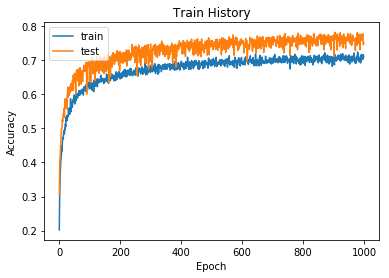

In [49]:
show_train_history('acc','val_acc')

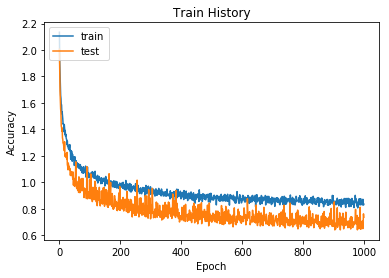

In [50]:
show_train_history('loss','val_loss')

In [51]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [52]:
prediction = model.predict_classes(x_test.reshape(x_test.shape[0], 32, 32, 3))

 9952/10000 [============================>.] - ETA: 0s

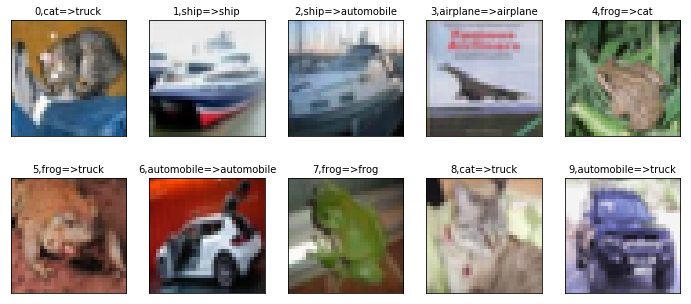

In [53]:
plot_images_labels_prediction(x_test, y_test, prediction, idx=0)

In [56]:
import pandas as pd
print(label_dict)
pd.crosstab(y_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,649,55,1,2,2,4,0,6,93,188
1,18,735,1,0,0,3,0,4,17,222
2,173,46,89,27,2,245,3,82,41,292
3,92,59,3,86,3,226,4,68,49,410
4,43,42,10,16,42,170,3,177,48,449
5,36,33,0,26,0,547,1,61,22,274
6,36,102,7,36,7,79,114,53,104,462
7,23,16,2,8,1,107,0,547,17,279
8,103,70,0,1,0,2,0,6,564,254
